### Background of Project

We are given a dataset of housing prices and possibily, related variables that we are to use to predict housing prices in Ames, Iowa. Kaggle score : 35473.12901

### Problem Statement: 

- What features best support the given sale price?

## Steps to implement
1. Import the libraries from https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data
2. Read the dataset using pandas from the train.csv file (file set aside for training)
3. Cleaning the dataset into a usable and clear state.
4. Create a linear regression model based on the training data. 
5. Evaluate our linear regression model on Kaggle.

## Important notes
**Target:** SalePrice

### 1. Import the necessary python libraries

In [2235]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [2236]:
import pandas_profiling

### 2. Import the csv into a dataframe

Data is imported from [here](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data)

In [2237]:
#import train data
df = pd.read_csv("../datasets/train.csv", index_col= 'Id')

### 3. Visually inspect the type of data

In [2238]:
#look at the data structure
df.info()
#columns of note: Alley, Pool QC, Fence, Misc Feature, Fireplace QC  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         2051 non-null object
Roof Matl          2

In [2239]:
df.shape

(2051, 80)

**Dropping data that have significantly incomplete data**

Data that are have less than 60% data are dropped as they would signifcantly influence the data.

In [2240]:
df = df.drop('Alley', axis = 1)

In [2241]:
df = df.drop('Pool QC', axis = 1)

In [2242]:
df = df.drop("Fence", axis = 1)

In [2243]:
df = df.drop("Misc Feature", axis = 1)

In [2244]:
df = df.drop("Fireplace Qu", axis = 1)

In [2245]:
df = df.drop("PID", axis = 1)

In [2246]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,44,0,0,0,0,0,3,2010,WD,130500
544,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,74,0,0,0,0,0,4,2009,WD,220000
153,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,52,0,0,0,0,0,1,2010,WD,109000
318,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,4,2010,WD,174000
255,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,59,0,0,0,0,0,3,2010,WD,138500


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a8fddcac8>,
      dtype=object)

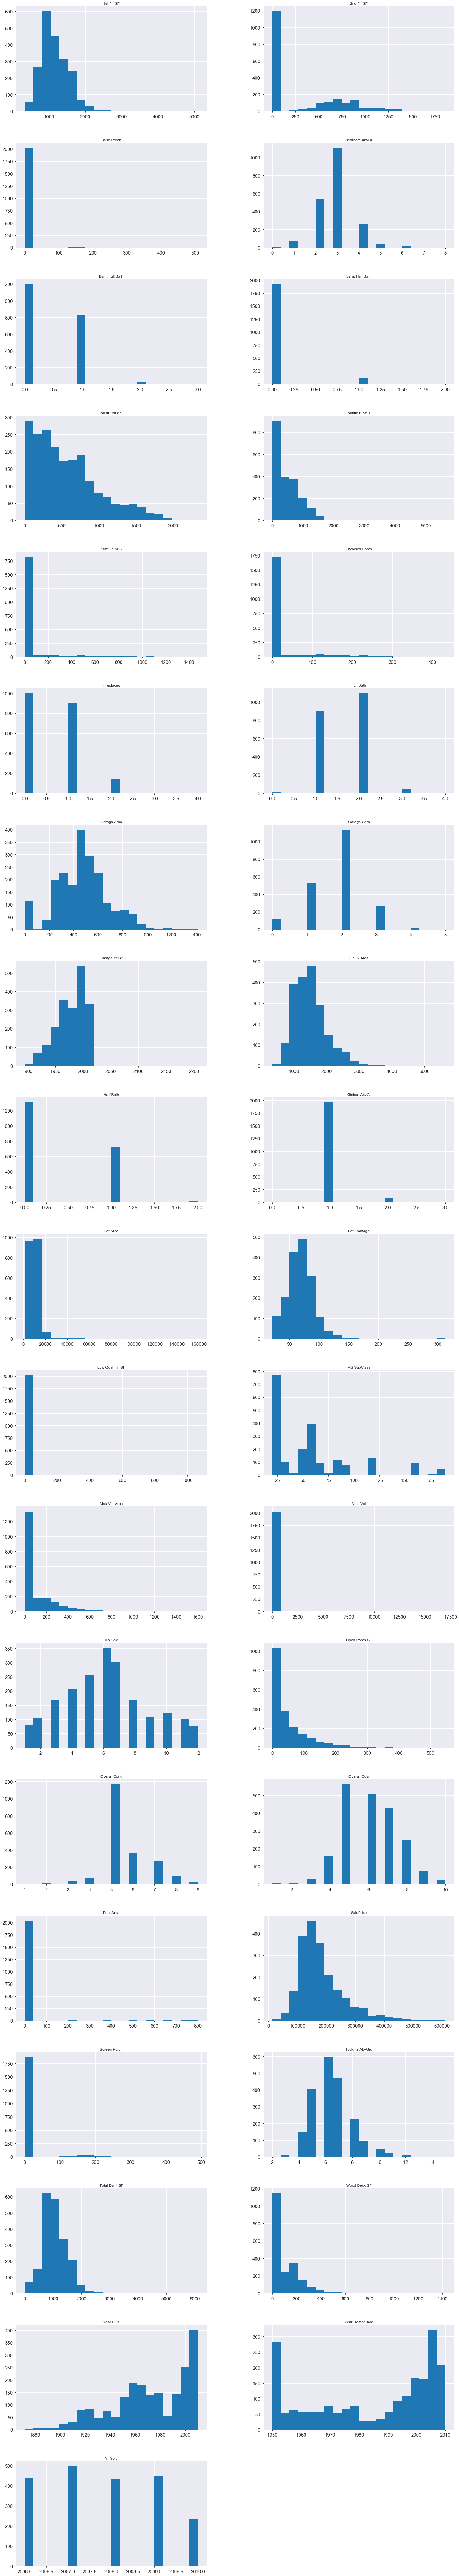

In [2247]:
df.hist(figsize = (25,150), layout= (19,2), bins = 20, ylabelsize = 15, xlabelsize =15 )

**Populating a list of columns from the dataframe and their options**

To check what are the data and its columns available from the dataset. 

In [2248]:
for col in (list(df.columns)):
    print(col, ":", df[col].unique())

MS SubClass : [ 60  20  50 180 160  70 120 190  85  30  90  80  75  45  40 150]
MS Zoning : ['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']
Lot Frontage : [ nan  43.  68.  73.  82. 137.  35.  70.  21.  64. 120.  24.  74.  93.
  34.  80.  71.  72. 109.  40. 103. 100.  92.  65.  75.  60.  30.  79.
  41. 105. 107.  81.  36.  63.  32.  94.  44.  50.  48.  67.  88.  83.
  53.  58.  57.  52.  87. 134.  56.  54. 140.  78.  85.  90.  96.  62.
  49.  59. 155.  91.  61.  86. 128.  77.  42.  89.  51.  69.  55. 112.
  76. 125.  98. 113. 102.  22. 122.  84. 119. 118.  66.  95. 108. 195.
 106.  39. 110. 130.  97.  45.  37. 123.  38. 129. 115.  47. 114. 104.
  46. 121. 124. 313. 141. 101.  99. 160. 174.  26. 144. 138. 111.  25.
  33. 200. 150. 117. 153. 116. 135.]
Lot Area : [13517 11492  7922 ... 12444 11449  7558]
Street : ['Pave' 'Grvl']
Lot Shape : ['IR1' 'Reg' 'IR2' 'IR3']
Land Contour : ['Lvl' 'HLS' 'Bnk' 'Low']
Utilities : ['AllPub' 'NoSeWa' 'NoSewr']
Lot Config : ['CulDSac' 'Inside' 'Corn

**Renaming columns to remove all capitalised entries, and also spaces.** 

Capitalisation and spaces were removed to make the dataset easier to recall column names by my own memory.

In [2249]:
n_col = df.columns
rename_dict = {}
for col in n_col: 
    rename_dict[col] = col.lower().replace(' ', "")

df.rename(columns = rename_dict, inplace = True)
df.columns

Index(['mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope',
       'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle',
       'overallqual', 'overallcond', 'yearbuilt', 'yearremod/add', 'roofstyle',
       'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea',
       'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond',
       'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc',
       'centralair', 'electrical', '1stflrsf', '2ndflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd',
       'functional', 'fireplaces', 'garagetype', 'garageyrblt', 'garagefinish',
       'garagecars', 'garagearea', 'garagequal', 'garagecond', 'paveddrive',
       'wooddecksf', 'openporchsf

**Identifying categorical and continuous variables**

I will be using iteration of the dataframe column index to identify which variables are categorical or continuous.

In [2250]:
## to populate a list of categorical variables
cat_col = df.columns
cat_list = list(df.select_dtypes(include = 'object').columns)

In [2251]:
## iterating through the categorical variable list to print out the variables and the unique entries
for col in cat_list:
    print(col, df[col].unique())
    
## creating a dictionary of categorical variables and the number of categories 
cat_options = {}
for col in cat_list:
    cat_options[col] = len(df[col].unique())

mszoning ['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']
street ['Pave' 'Grvl']
lotshape ['IR1' 'Reg' 'IR2' 'IR3']
landcontour ['Lvl' 'HLS' 'Bnk' 'Low']
utilities ['AllPub' 'NoSeWa' 'NoSewr']
lotconfig ['CulDSac' 'Inside' 'Corner' 'FR2' 'FR3']
landslope ['Gtl' 'Sev' 'Mod']
neighborhood ['Sawyer' 'SawyerW' 'NAmes' 'Timber' 'Edwards' 'OldTown' 'BrDale'
 'CollgCr' 'Somerst' 'Mitchel' 'StoneBr' 'NridgHt' 'Gilbert' 'Crawfor'
 'IDOTRR' 'NWAmes' 'Veenker' 'MeadowV' 'SWISU' 'NoRidge' 'ClearCr'
 'Blmngtn' 'BrkSide' 'NPkVill' 'Blueste' 'GrnHill' 'Greens' 'Landmrk']
condition1 ['RRAe' 'Norm' 'PosA' 'Artery' 'Feedr' 'PosN' 'RRAn' 'RRNe' 'RRNn']
condition2 ['Norm' 'RRNn' 'Feedr' 'Artery' 'PosA' 'PosN' 'RRAe' 'RRAn']
bldgtype ['1Fam' 'TwnhsE' 'Twnhs' '2fmCon' 'Duplex']
housestyle ['2Story' '1Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin' '1.5Unf']
roofstyle ['Gable' 'Hip' 'Flat' 'Mansard' 'Shed' 'Gambrel']
roofmatl ['CompShg' 'WdShngl' 'Tar&Grv' 'WdShake' 'Membran' 'ClyTile']
exterior1st ['Hd

In [2252]:
# listing out continuous variables
cont_col = df.columns
cont_list = list(df.select_dtypes(include = 'int').columns)

In [2253]:
df[cont_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 26 columns):
mssubclass       2051 non-null int64
lotarea          2051 non-null int64
overallqual      2051 non-null int64
overallcond      2051 non-null int64
yearbuilt        2051 non-null int64
yearremod/add    2051 non-null int64
1stflrsf         2051 non-null int64
2ndflrsf         2051 non-null int64
lowqualfinsf     2051 non-null int64
grlivarea        2051 non-null int64
fullbath         2051 non-null int64
halfbath         2051 non-null int64
bedroomabvgr     2051 non-null int64
kitchenabvgr     2051 non-null int64
totrmsabvgrd     2051 non-null int64
fireplaces       2051 non-null int64
wooddecksf       2051 non-null int64
openporchsf      2051 non-null int64
enclosedporch    2051 non-null int64
3ssnporch        2051 non-null int64
screenporch      2051 non-null int64
poolarea         2051 non-null int64
miscval          2051 non-null int64
mosold           2051 non-null int64
yrsol

In [2254]:
df[cont_list].describe()

,mssubclass,lotarea,overallqual,overallcond,yearbuilt,yearremod/add,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,...,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,57.008776,10065.208191,6.112140,5.562165,1971.708922,1984.190151,1164.488055,329.329108,5.512921,1499.330083,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,42.824223,6742.488909,1.426271,1.104497,30.177889,21.036250,396.446923,425.671046,51.068870,500.447829,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,879.500000,0.000000,0.000000,1129.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,50.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,1093.000000,0.000000,0.000000,1444.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,70.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,1405.000000,692.500000,0.000000,1728.500000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,5095.000000,1862.000000,1064.000000,5642.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


### 4. Exploring correlations between continuous variables 
Correlations between continuous variables were explored to see if they had good significant Pearson correlation with `saleprice` and then were tested for multicollinearity using varience inflation factor from scikit learn. 

Text(0.5, 1, 'Heatmap of Continuous Variable Correlation to Sale Price')

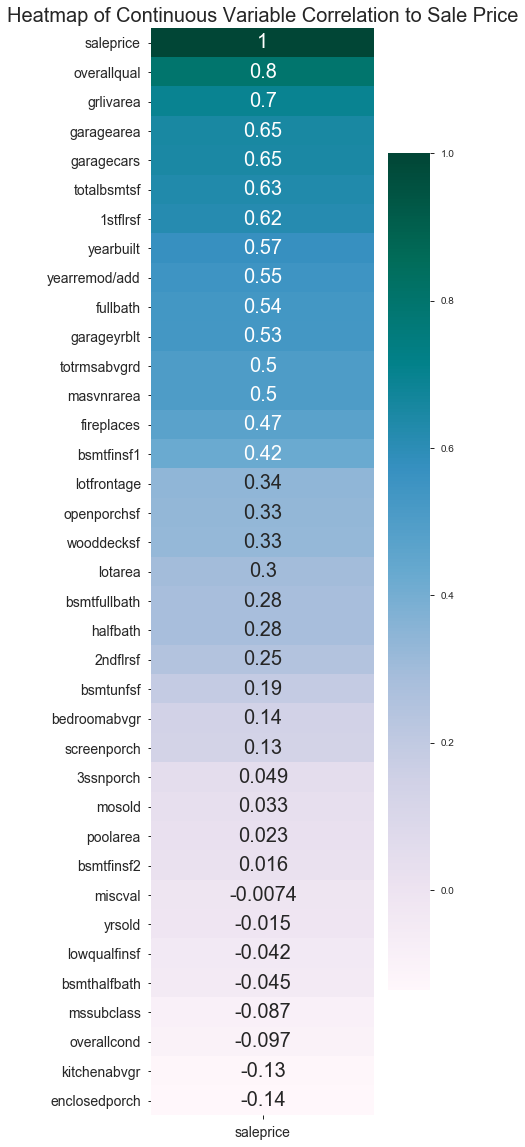

In [2377]:
plt.figure(figsize = (5,20))
#ax = sns.heatmap(df[cont_list].corr(), annot = True)

ax= sns.heatmap(df.corr()[cont_list][['saleprice']].sort_values(by = 'saleprice',ascending = False),annot=True,  annot_kws={"size": 20}, cmap='PuBuGn')
ax.set_ylim(37,0)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title('Heatmap of Continuous Variable Correlation to Sale Price', size = 20)

In [2256]:
## calculating the P value of the correlations above
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(stats.pearsonr(df[r], df[c])[1], 4)
    return pvalues

## calculating the P values of the correlation between continuous variables and saleprice
calculate_pvalues(df[cont_list])['saleprice'].sort_values(ascending = False)

miscval          0.7385
yrsold           0.4914
poolarea         0.2956
mosold           0.1383
lowqualfinsf     0.0596
3ssnporch        0.0273
mssubclass       0.0001
grlivarea             0
lotarea               0
overallqual           0
overallcond           0
yearbuilt             0
yearremod/add         0
1stflrsf              0
2ndflrsf              0
saleprice             0
fullbath              0
halfbath              0
kitchenabvgr          0
totrmsabvgrd          0
fireplaces            0
wooddecksf            0
openporchsf           0
enclosedporch         0
screenporch           0
bedroomabvgr          0
Name: saleprice, dtype: object

In [2257]:
## making a function to find collinearity between expected collinear variables
def viffinder(varlist):
    vif = pd.DataFrame()
    vif["variables"] = varlist
    vif["VIF"] = \
    [variance_inflation_factor(df[varlist].dropna().values,\
                               i) for i in range(df[varlist].shape[1])]
    print(vif)

In [2258]:
## selecting the top few variables correlation to saleprice, positive correlations 
## were chosen as negative correlations had small correlation coefficients.

top_corr_list = list(df.corr()[cont_list][['saleprice']].sort_values(by = 'saleprice',\
                                                ascending = False).nlargest(30,['saleprice']).index)
print(top_corr_list)


['saleprice', 'overallqual', 'grlivarea', 'garagearea', 'garagecars', 'totalbsmtsf', '1stflrsf', 'yearbuilt', 'yearremod/add', 'fullbath', 'garageyrblt', 'masvnrarea', 'totrmsabvgrd', 'fireplaces', 'bsmtfinsf1', 'lotfrontage', 'openporchsf', 'wooddecksf', 'lotarea', 'bsmtfullbath', 'halfbath', '2ndflrsf', 'bsmtunfsf', 'bedroomabvgr', 'screenporch', '3ssnporch', 'mosold', 'poolarea', 'bsmtfinsf2', 'miscval']


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5]),
 <a list of 30 Text xticklabel objects>)

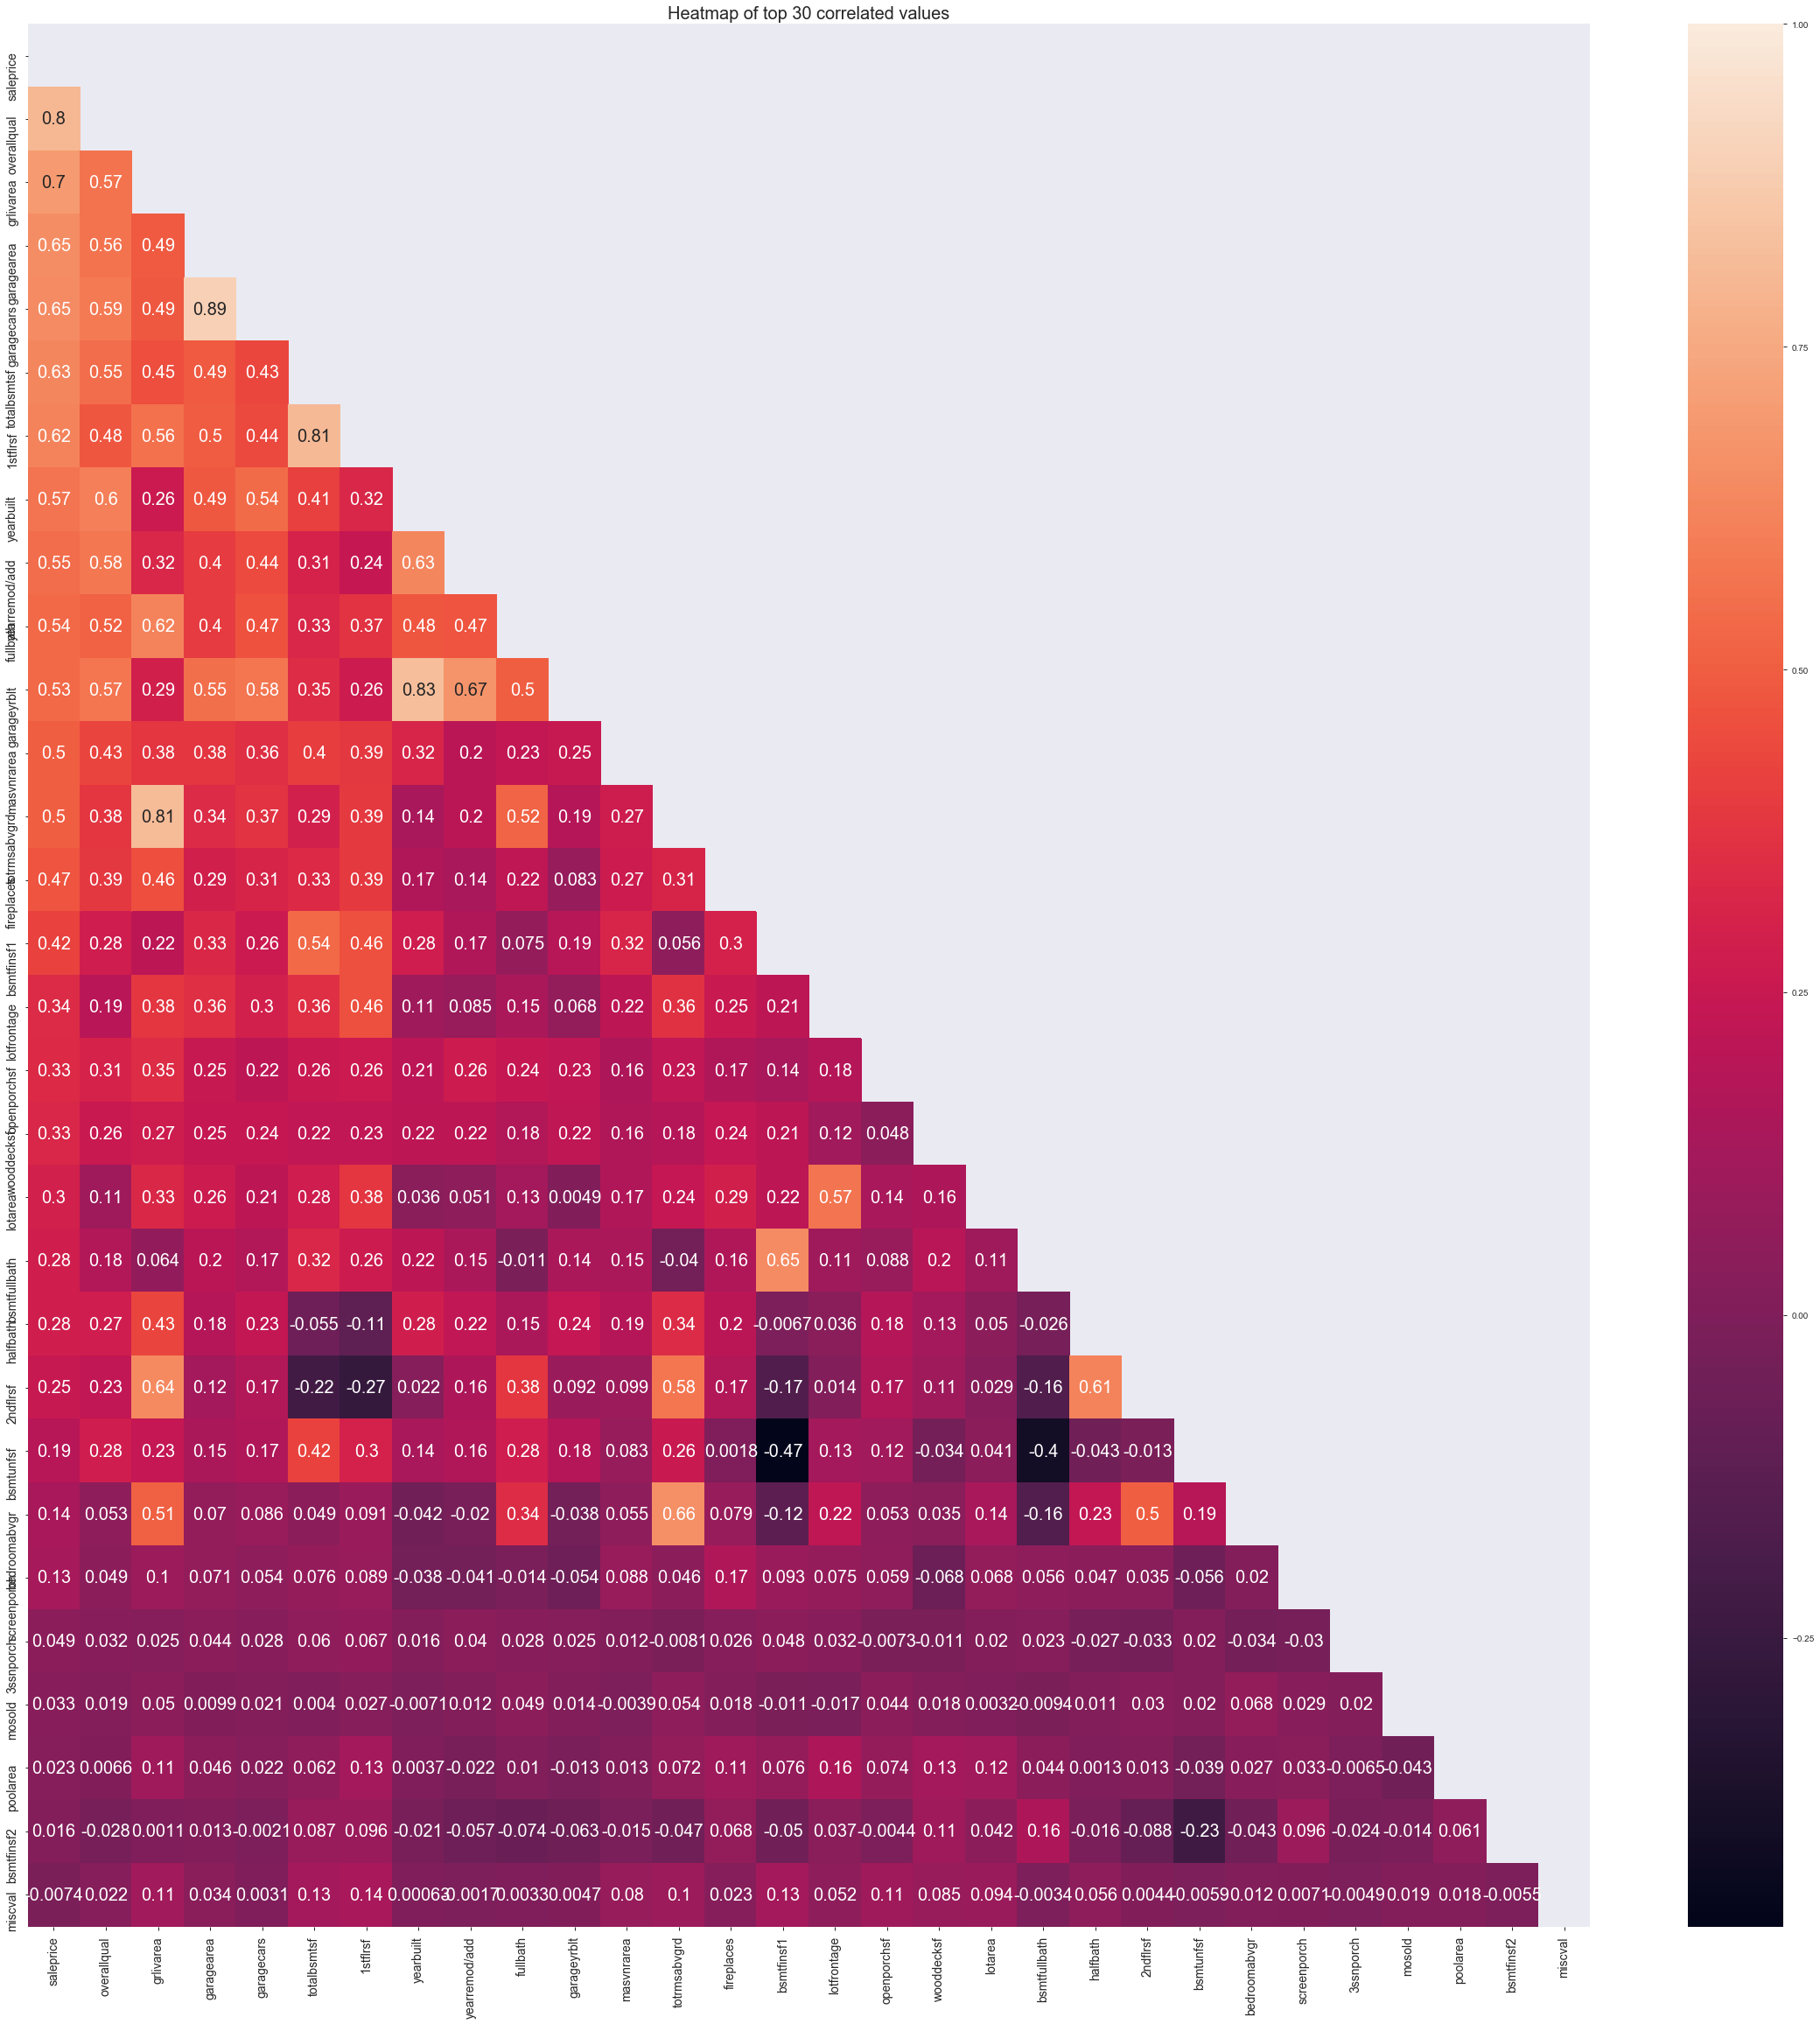

In [2380]:
#setting mask up 
mask = np.zeros_like(df[top_corr_list].corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (40,40))
plt.title('Heatmap of top 30 correlated values', size = 20)
ax = sns.heatmap(df[top_corr_list].corr(), annot = True, annot_kws={"size": 20}, mask = mask)
ax.set_ylim(30,0)
plt.yticks(size = 14, rotation = 90)
plt.xticks(size = 14)

(array([0.5, 1.5, 2.5]), <a list of 3 Text xticklabel objects>)

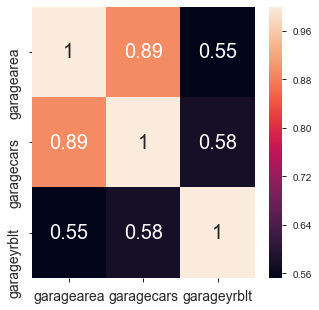

In [2260]:
## garage related variables were chosen from the top correlated list and plotted
garage_trio = [cat for cat in top_corr_list if cat.find('garage') >= 0 ]

plt.figure(figsize = (5,5))
ax = sns.heatmap(df[garage_trio].corr(), annot = True, annot_kws={"size": 20})
ax.set_ylim(3,0)
plt.yticks(size = 14)
plt.xticks(size = 14)

In [2261]:
## finding the VIF
viffinder(garage_trio)

     variables        VIF
0   garagearea  28.954657
1   garagecars  33.658878
2  garageyrblt   9.930975


All of the garage related variables have VIF which shows high collinearity, thus `garagearea` will be chosen as it has the highest correlation to `saleprice`.

(array([0.5, 1.5]), <a list of 2 Text xticklabel objects>)

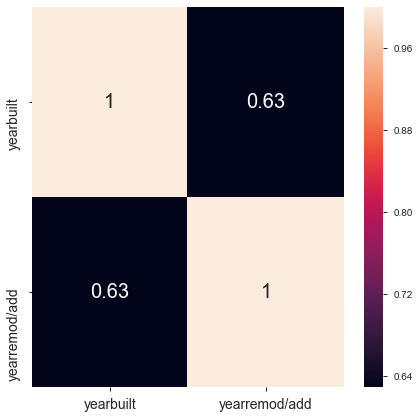

In [2262]:
## the variables relating to year of last build were tested 
year_var = [cat for cat in top_corr_list if cat.find('year') >= 0 ]

plt.figure(figsize = (7,7))
ax = sns.heatmap(df[year_var].corr(), annot = True, annot_kws={"size": 20})
ax.set_ylim(2,0)
plt.yticks(size = 14)
plt.xticks(size = 14)

In [2263]:
#finding the VIF
viffinder(year_var)

       variables          VIF
0      yearbuilt  7023.224832
1  yearremod/add  7023.224832


Both `yearbuilt` and `yearremod/add` showed very high VIF values with each other, thus `yearremod/add` was dropped as it had a lower correlation.

In [2264]:
## basement related variables were listed together
basementvar =[cat for cat in top_corr_list if cat.find('bsmt') >= 0 ]
basementvar

['totalbsmtsf', 'bsmtfinsf1', 'bsmtfullbath', 'bsmtunfsf', 'bsmtfinsf2']

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text xticklabel objects>)

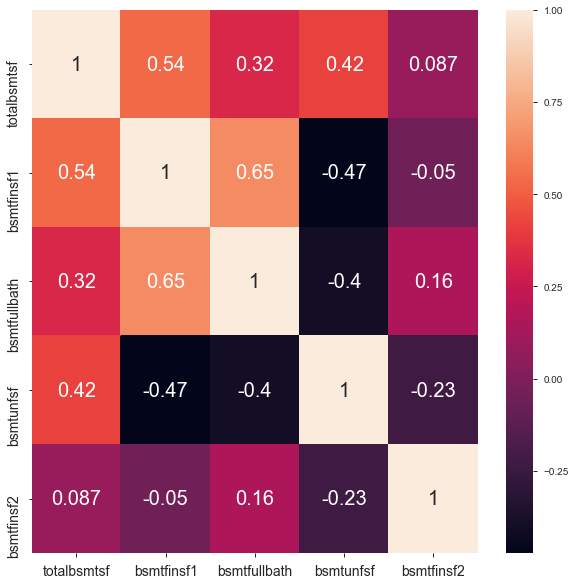

In [2265]:
## basement related variables were plotted for correlation.
plt.figure(figsize = (10,10))
ax = sns.heatmap(df[basementvar].corr(), annot = True, annot_kws={"size": 20})
ax.set_ylim(5,0)
plt.yticks(size = 14)
plt.xticks(size = 14)

In [2266]:
viffinder(basementvar)

      variables       VIF
0   totalbsmtsf       inf
1    bsmtfinsf1       inf
2  bsmtfullbath  3.012996
3     bsmtunfsf       inf
4    bsmtfinsf2       inf


/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Only `bsmtfullbath` showed low collinearity with each other. `totalbsmtsf` was also chosen due to being the highest correlation coefficient. 

In [2267]:
leftover = set(top_corr_list) - set(basementvar) - set(garage_trio) - set(year_var)
leftover = list(leftover)
leftover

['lotfrontage',
 'wooddecksf',
 'masvnrarea',
 'poolarea',
 '1stflrsf',
 'grlivarea',
 'halfbath',
 'fireplaces',
 'saleprice',
 'openporchsf',
 'fullbath',
 'overallqual',
 'miscval',
 'bedroomabvgr',
 '2ndflrsf',
 'screenporch',
 'totrmsabvgrd',
 'mosold',
 'lotarea',
 '3ssnporch']

[Text(0, 0.5, 'lotfrontage'),
 Text(0, 1.5, 'wooddecksf'),
 Text(0, 2.5, 'masvnrarea'),
 Text(0, 3.5, 'poolarea'),
 Text(0, 4.5, '1stflrsf'),
 Text(0, 5.5, 'grlivarea'),
 Text(0, 6.5, 'halfbath'),
 Text(0, 7.5, 'fireplaces'),
 Text(0, 8.5, 'saleprice'),
 Text(0, 9.5, 'openporchsf'),
 Text(0, 10.5, 'fullbath'),
 Text(0, 11.5, 'overallqual'),
 Text(0, 12.5, 'miscval'),
 Text(0, 13.5, 'bedroomabvgr'),
 Text(0, 14.5, '2ndflrsf'),
 Text(0, 15.5, 'screenporch'),
 Text(0, 16.5, 'totrmsabvgrd'),
 Text(0, 17.5, 'mosold'),
 Text(0, 18.5, 'lotarea'),
 Text(0, 19.5, '3ssnporch')]

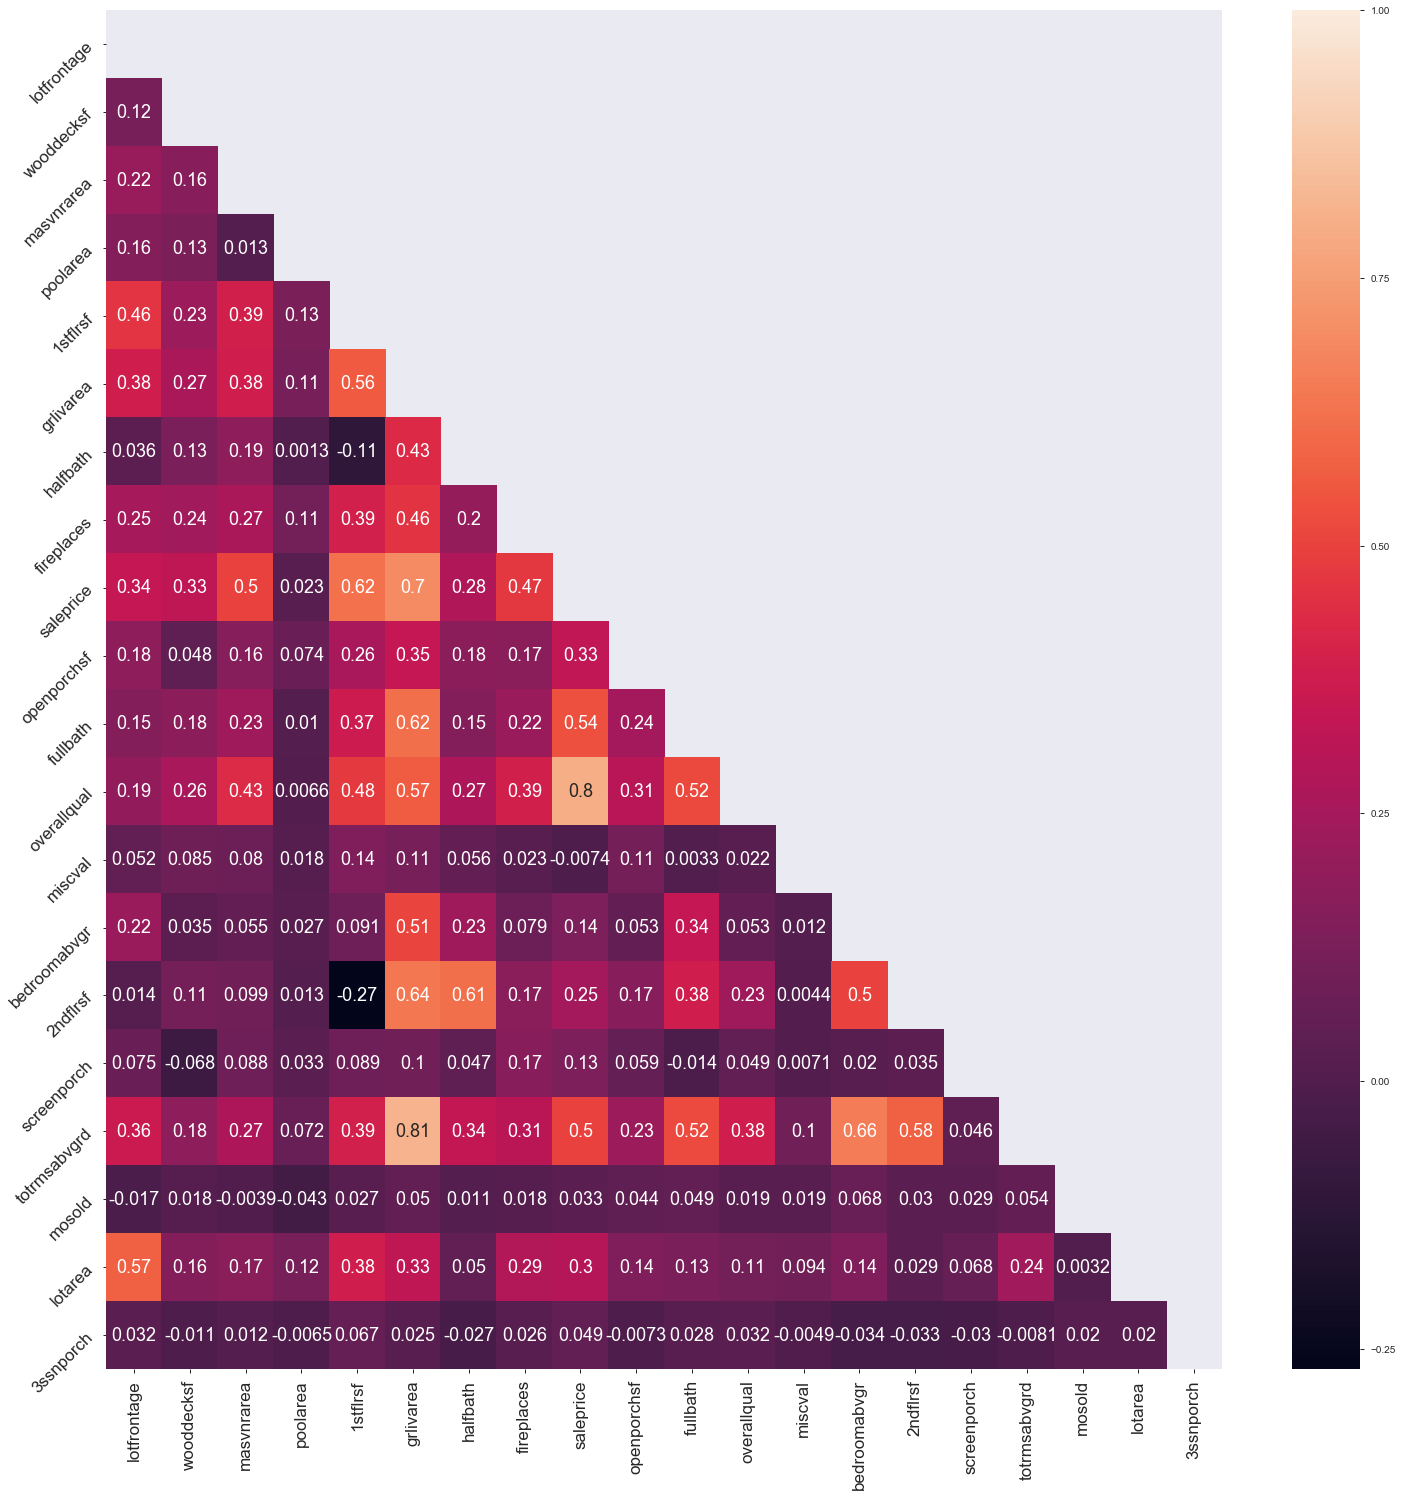

In [2427]:
#setting mask up 
mask = np.zeros_like(df[leftover].corr())
mask[np.triu_indices_from(mask)] = True

## the remaining variables were plotted for correlation.
plt.figure(figsize = (25,25))
ax = sns.heatmap(df[leftover].corr(), annot = True, annot_kws={"size": 18}, mask = mask)
ax.set_ylim(20,0)
plt.yticks(size = 17)
plt.xticks(size = 17)
ax.set_yticklabels(leftover,rotation = 45)

In [2269]:
viffinder(leftover)

       variables         VIF
0    lotfrontage   16.113018
1     wooddecksf    1.871388
2     masvnrarea    1.896760
3       poolarea    1.102490
4       1stflrsf  586.494631
5      grlivarea  921.262549
6       halfbath    2.657137
7     fireplaces    2.576286
8      saleprice   26.200634
9    openporchsf    1.812263
10      fullbath   18.095659
11   overallqual   36.446228
12       miscval    1.131738
13  bedroomabvgr   25.558351
14      2ndflrsf  108.431734
15   screenporch    1.170186
16  totrmsabvgrd   65.440977
17        mosold    5.721490
18       lotarea    8.558904
19     3ssnporch    1.021344


`masvnrarea`, `poolarea`, `halfbath`, `fireplaces`, `fireplaces`, `openporchsf`, `screenporch`, `lotarea`, `3ssnporch` were chosen as they had low VIF.  `overallqual` and `grlivarea` were remained as they were not covered by other variables.

In [2270]:
## final correlation picked list of variables
final_corr_list = ['overallqual', 'masvnrarea', 'poolarea', 'halfbath', \
                   'fireplaces', 'openporchsf', 'grlivarea', 'screenporch', \
                   'lotarea', '3ssnporch', 'bsmtfullbath', 'totalbsmtsf', \
                  'garagearea', 'yearbuilt']

In [2271]:
viffinder(final_corr_list)

       variables        VIF
0    overallqual  43.928379
1     masvnrarea   1.811127
2       poolarea   1.040005
3       halfbath   2.210379
4     fireplaces   2.605008
5    openporchsf   1.763804
6      grlivarea  22.747272
7    screenporch   1.124378
8        lotarea   4.032884
9      3ssnporch   1.017818
10  bsmtfullbath   1.928679
11   totalbsmtsf  13.496182
12    garagearea   9.862637
13     yearbuilt  27.950242


In [2272]:
df[final_corr_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 14 columns):
overallqual     2051 non-null int64
masvnrarea      2029 non-null float64
poolarea        2051 non-null int64
halfbath        2051 non-null int64
fireplaces      2051 non-null int64
openporchsf     2051 non-null int64
grlivarea       2051 non-null int64
screenporch     2051 non-null int64
lotarea         2051 non-null int64
3ssnporch       2051 non-null int64
bsmtfullbath    2049 non-null float64
totalbsmtsf     2050 non-null float64
garagearea      2050 non-null float64
yearbuilt       2051 non-null int64
dtypes: float64(4), int64(10)
memory usage: 240.4 KB


### 5. Using simple statistical inference tests to determine a possible relationship between categorical  variables and price

I will be using a number of statistical inference tests to see if any of the relationships between categorical variables and price are significant before running linear regression.

In [2273]:
## selecting categories for t-test 
ttest_list = []
for catkey, catvalues in cat_options.items(): 
    if catvalues == 2:
        ttest_list.append(catkey)
ttest_list

['street', 'centralair']

In [2274]:
## performing t-test on columns in ttest_list
cat_result_dict = {}
for tcand in ttest_list:
    cat1 = df[df[tcand]==(df[tcand].unique()[0])]['saleprice']
    cat2 = df[df[tcand]==(df[tcand].unique()[1])]['saleprice']
    t, p = stats.ttest_ind(cat1, cat2)
    sig = ''
    if p <= 0.05:
        sig = 'Y'
    else: 
        sig = 'N'
    cat_result_dict[tcand] = {df[tcand].unique()[0]:cat1.mean(),\
                              df[tcand].unique()[1]:cat2.mean(), \
                              'statistic': t, 'P': p, 'significance': sig}

cat_result_dict

{'street': {'Pave': 181793.56555772995,
  'Grvl': 86901.42857142857,
  'statistic': 3.169173295799292,
  'P': 0.0015512882730560206,
  'significance': 'Y'},
 'centralair': {'Y': 187441.50366492147,
  'N': 100575.0780141844,
  'statistic': 13.068548592323888,
  'P': 1.5113094019787156e-37,
  'significance': 'Y'}}

Both street and centralair variables showed a significant difference in mean salesprice between categories. 
* Houses with paved streets had higher sale price as compared to gravel. 
* Houses with central airconditioning had higher sale price as compared to those without

In [2275]:
## removing ttestlist variables from cat_list so that it will not be run again
def rem_entry_list(list1, list2):
    for var1 in list1: 
        if var1 in list2:
            list2.remove(var1)
            next
        return list2
rem_entry_list(ttest_list, cat_list)

['mszoning',
 'lotshape',
 'landcontour',
 'utilities',
 'lotconfig',
 'landslope',
 'neighborhood',
 'condition1',
 'condition2',
 'bldgtype',
 'housestyle',
 'roofstyle',
 'roofmatl',
 'exterior1st',
 'exterior2nd',
 'masvnrtype',
 'exterqual',
 'extercond',
 'foundation',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'bsmtfintype1',
 'bsmtfintype2',
 'heating',
 'heatingqc',
 'centralair',
 'electrical',
 'kitchenqual',
 'functional',
 'garagetype',
 'garagefinish',
 'garagequal',
 'garagecond',
 'paveddrive',
 'saletype']

In [2276]:
## defining a function to perform ANOVA through the list 
def ANOVA_list(searchlist, dataframe, resultdict):
    a = {}
    for var in searchlist:
        var_unique_list = []
        count = 0
        resultdict[var] = {}
        for i in range(len(dataframe[var].unique())):
            count += 1 
            if pd.isnull(dataframe[var].unique()[i]) == True:
                next
            else:
                var_unique_list.append(dataframe[var].unique()[i])
                dataframe[var].unique()[i] = dataframe[dataframe[var]==\
                        (dataframe[var].unique()[i])]['saleprice']
        for cat in var_unique_list:
            if pd.isnull(cat) == True:
                next
            else:
                resultdict[var][str(cat)] = \
                dataframe['saleprice'][dataframe[var]\
                                       == cat].mean()
        f, p = stats.f_oneway(*(dataframe['saleprice'][dataframe[var]\
                                    == cat] for cat in var_unique_list))
        resultdict[var]['statistic'] = f
        resultdict[var]['P'] = p 
    return resultdict

In [2277]:
ANOVA_list(cat_list, df, cat_result_dict)

{'street': {'Pave': 181793.56555772995,
  'Grvl': 86901.42857142857,
  'statistic': 3.169173295799292,
  'P': 0.0015512882730560206,
  'significance': 'Y'},
 'centralair': {'Y': 187441.50366492147,
  'N': 100575.0780141844,
  'statistic': 170.78696230993063,
  'P': 1.5113094019793903e-37},
 'mszoning': {'RL': 191235.16458072592,
  'RM': 129119.14240506329,
  'FV': 218618.31683168316,
  'C (all)': 78010.8947368421,
  'A (agr)': 47300.0,
  'RH': 148859.57142857142,
  'I (all)': 57625.0,
  'statistic': 42.46657889196624,
  'P': 4.706623428740341e-49},
 'lotshape': {'IR1': 211848.67052023122,
  'Reg': 162925.81235521234,
  'IR2': 233954.74545454545,
  'IR3': 193182.22222222222,
  'statistic': 72.48679839510044,
  'P': 1.491278709891155e-44},
 'landcontour': {'Lvl': 178998.5648399349,
  'HLS': 262353.37647058826,
  'Bnk': 142868.775,
  'Low': 199313.11627906977,
  'statistic': 39.23484353043047,
  'P': 1.1956767644954456e-24},
 'utilities': {'AllPub': 181551.60224499757,
  'NoSeWa': 137500.

In [2278]:
# iterating the dictionary to provide list of significant 
significantlist = []
for key1, dict1 in cat_result_dict.items(): 
    for key2, value1 in dict1.items():
        if key2 == 'P':
            if value1 < 0.05:
                significantlist.append(key1)
        else: 
            next
significantlist

['street',
 'centralair',
 'mszoning',
 'lotshape',
 'landcontour',
 'lotconfig',
 'landslope',
 'neighborhood',
 'condition1',
 'condition2',
 'bldgtype',
 'housestyle',
 'roofstyle',
 'roofmatl',
 'exterior1st',
 'exterior2nd',
 'masvnrtype',
 'exterqual',
 'extercond',
 'foundation',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'bsmtfintype1',
 'bsmtfintype2',
 'heating',
 'heatingqc',
 'electrical',
 'kitchenqual',
 'functional',
 'garagetype',
 'garagefinish',
 'garagequal',
 'garagecond',
 'paveddrive',
 'saletype']

In [2279]:
## creating a dict of variables with highest statistic 
top_Fstatistic_dict = {}
index = []
count = 0
for key1, dict1 in cat_result_dict.items(): 
    if dict1['P'] <= 0.05:
        top_Fstatistic_dict[key1] = dict1['statistic']
        index.append(count)
        count += 1
    else: 
        next
Fstat_df = pd.DataFrame(list(top_Fstatistic_dict.items()), index = index, columns = ["variable", "stat"])


In [2280]:
## creating a list of categorical variables with high T or F statistic
top_cat_list = list(Fstat_df.sort_values(by = 'stat', ascending = False).nlargest(15,['stat'])['variable'])

In [2281]:
## removing related variables 
top_cat_list.remove('bsmtexposure') # variable was removed due to similarity to other variables
top_cat_list.remove('bsmtfintype1') # variable was removed due to similarity to other variables
top_cat_list.remove('garagetype') # variable was removed due to similarity to other variables

top_cat_list

['exterqual',
 'kitchenqual',
 'bsmtqual',
 'garagefinish',
 'masvnrtype',
 'centralair',
 'foundation',
 'heatingqc',
 'neighborhood',
 'paveddrive',
 'lotshape',
 'saletype']

### Finding out which categorical variables that have NaN values 
To properly determine which categorical variables have logical NaN values that can be explained I created a na_list so as to determine out of the dataset which variables have a nan unique category. 


I then compared the variables to the data dictionary provided in the kaggle website with other documentation. 

|Variables|NaN meaning|Decision|
|---|---|---|
|masvnrtype|missing values|to use an imputer to fill|
|bsmtqual|No basement|change to a new category with No basement or use the continuous variable for the model|
|bsmtcond|No basement|change to a new category with No basement or use the continuous variable for the model|
|bsmtexposure|No basement|change to a new category with No basement or use the continuous variable for the model|
|bsmtfintype1|No basement|change to a new category with No basement or use the continuous variable for the model|
|bsmtfintype2|No basement|change to a new category with No basement or use the continuous variable for the model|
|garagetype|No garage|change to a new category with No garage or use the continuous variable for the model|
|garagefinish|No garage|change to a new category with No garage or use the continuous variable for the model|
|garagequal|No garage|change to a new category with No garage or use the continuous variable for the model|
|garagecond|No garage|change to a new category with No garage or use the continuous variable for the model|

Assumption: All categorical variables are true as a visual check on the available variables on the list shows that there are no ordinal nor categorical variables on it. 

In [2282]:
df[top_cat_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 12 columns):
exterqual       2051 non-null object
kitchenqual     2051 non-null object
bsmtqual        1996 non-null object
garagefinish    1937 non-null object
masvnrtype      2029 non-null object
centralair      2051 non-null object
foundation      2051 non-null object
heatingqc       2051 non-null object
neighborhood    2051 non-null object
paveddrive      2051 non-null object
lotshape        2051 non-null object
saletype        2051 non-null object
dtypes: object(12)
memory usage: 208.3+ KB


In [2283]:
## filling in the missing variables
print(df.bsmtqual.mode())
print(df.garagefinish.mode())
print(df.masvnrtype.mode())

0    TA
dtype: object
0    Unf
dtype: object
0    None
dtype: object


To impute the missing entries for categorical variables, the mode of each column will be used. 

In [2284]:
## replacing all NaN with mode
df['bsmtqual'].fillna('TA', inplace = True)
df['garagefinish'].fillna('Unf', inplace = True)
df['masvnrtype'].fillna('None', inplace = True)

In [2285]:
df[top_stat_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 12 columns):
exterqual       2051 non-null object
kitchenqual     2051 non-null object
bsmtqual        2051 non-null object
garagefinish    2051 non-null object
masvnrtype      2051 non-null object
centralair      2051 non-null object
foundation      2051 non-null object
heatingqc       2051 non-null object
neighborhood    2051 non-null object
paveddrive      2051 non-null object
lotshape        2051 non-null object
saletype        2051 non-null object
dtypes: object(12)
memory usage: 208.3+ KB


**Imputing missing values in continuous variables**

Missing entries in continuous variables are imputed with the median or mean of the variable depending if it is normally distributed.

In [2286]:
## finding which categorical variable has nan unique cat
na_list = []
for col in top_corr_list:
    for cat in df[col].unique():
        if type(cat) == float:
            na_list.append(col)
print('categories with nan entries', na_list)

categories with nan entries []


In [2287]:
df[final_corr_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 14 columns):
overallqual     2051 non-null int64
masvnrarea      2029 non-null float64
poolarea        2051 non-null int64
halfbath        2051 non-null int64
fireplaces      2051 non-null int64
openporchsf     2051 non-null int64
grlivarea       2051 non-null int64
screenporch     2051 non-null int64
lotarea         2051 non-null int64
3ssnporch       2051 non-null int64
bsmtfullbath    2049 non-null float64
totalbsmtsf     2050 non-null float64
garagearea      2050 non-null float64
yearbuilt       2051 non-null int64
dtypes: float64(4), int64(10)
memory usage: 240.4 KB


(0.6384734511375427, 0.0)
0.0


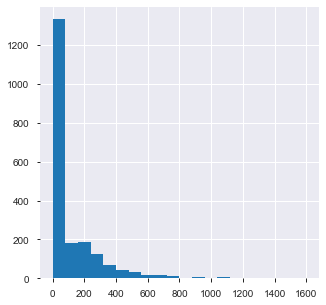

In [2288]:
df.masvnrarea.hist(figsize = (5,5), bins = 20)
print(stats.shapiro(df.masvnrarea.dropna()))
## The Shapiro-Wilks test showed the distribution is significantly non- normal, median used to impute 
print(df.masvnrarea.median())
df.masvnrarea.fillna(df.masvnrarea.median(), inplace=True)

(0.6606758832931519, 0.0)
0.0


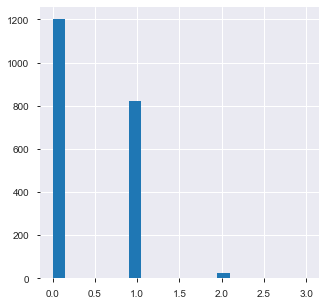

In [2289]:
df.bsmtfullbath.hist(figsize = (5,5), bins = 20)
print(stats.shapiro(df.bsmtfullbath.dropna()))
## The Shapiro-Wilks test showed the distribution is significantly non- normal, median used to impute 
print(df.bsmtfullbath.median())
df.bsmtfullbath.fillna(df.bsmtfullbath.median(), inplace = True)

(0.9275934100151062, 2.227390454751659e-30)
994.5


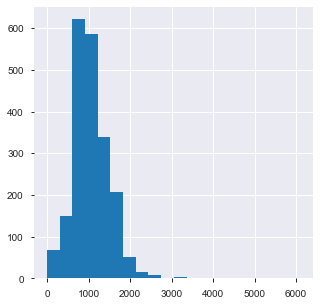

In [2290]:
df.totalbsmtsf.hist(figsize = (5,5), bins = 20)
print(stats.shapiro(df.totalbsmtsf.dropna()))
## The Shapiro-Wilks test showed the distribution is significantly non- normal, median used to impute
print(df.totalbsmtsf.median())
df.totalbsmtsf.fillna(df.totalbsmtsf.median(), inplace=True)

(0.9763252139091492, 6.247190586439361e-18)
480.0


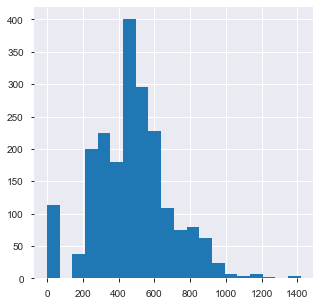

In [2291]:
df.garagearea.hist(figsize = (5,5), bins = 20)
print(stats.shapiro(df.garagearea.dropna())) 
## The Shapiro-Wilks test showed the distribution is significantly non- normal, median used to impute
print(df.garagearea.median())
df.garagearea.fillna(df.garagearea.median(), inplace=True)

In [2292]:
df[final_corr_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 14 columns):
overallqual     2051 non-null int64
masvnrarea      2051 non-null float64
poolarea        2051 non-null int64
halfbath        2051 non-null int64
fireplaces      2051 non-null int64
openporchsf     2051 non-null int64
grlivarea       2051 non-null int64
screenporch     2051 non-null int64
lotarea         2051 non-null int64
3ssnporch       2051 non-null int64
bsmtfullbath    2051 non-null float64
totalbsmtsf     2051 non-null float64
garagearea      2051 non-null float64
yearbuilt       2051 non-null int64
dtypes: float64(4), int64(10)
memory usage: 240.4 KB


**Making dummies of categorical variables**

Changing the variables into dummy coded variables. This is for the ease of doing linear regression later. 

In [2874]:
interest= top_cat_list+final_corr_list
interest.append('saleprice')

In [2875]:
interest.remove('centralair')
interest.remove('openporchsf')
interest.remove('halfbath')
interest.remove('foundation')
interest.remove('saletype')

print(len(interest))
interestdf = df[interest]

22


In [2876]:
interestdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 22 columns):
exterqual       2051 non-null object
kitchenqual     2051 non-null object
bsmtqual        2051 non-null object
garagefinish    2051 non-null object
masvnrtype      2051 non-null object
heatingqc       2051 non-null object
neighborhood    2051 non-null object
paveddrive      2051 non-null object
lotshape        2051 non-null object
overallqual     2051 non-null int64
masvnrarea      2051 non-null float64
poolarea        2051 non-null int64
fireplaces      2051 non-null int64
grlivarea       2051 non-null int64
screenporch     2051 non-null int64
lotarea         2051 non-null int64
3ssnporch       2051 non-null int64
bsmtfullbath    2051 non-null float64
totalbsmtsf     2051 non-null float64
garagearea      2051 non-null float64
yearbuilt       2051 non-null int64
saleprice       2051 non-null int64
dtypes: float64(4), int64(9), object(9)
memory usage: 448.5+ KB


In [2877]:
## creating an ordinal dictionary
qual = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}

In [2878]:
## mapping qual to all qual variables
interestdf['exterq'] = interestdf.exterqual.map(qual)
interestdf = interestdf.drop('exterqual', axis = 1)
interestdf['heatingq'] = interestdf.heatingqc.map(qual)
interestdf = interestdf.drop('heatingqc', axis = 1)
interestdf['bsmtq'] = interestdf.bsmtqual.map(qual)
interestdf = interestdf.drop('bsmtqual', axis = 1)
interestdf['kitchenq'] = interestdf.kitchenqual.map(qual)
interestdf = interestdf.drop('kitchenqual', axis = 1)

/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [2879]:
interest = list(interestdf.columns)
interest

['garagefinish',
 'masvnrtype',
 'neighborhood',
 'paveddrive',
 'lotshape',
 'overallqual',
 'masvnrarea',
 'poolarea',
 'fireplaces',
 'grlivarea',
 'screenporch',
 'lotarea',
 '3ssnporch',
 'bsmtfullbath',
 'totalbsmtsf',
 'garagearea',
 'yearbuilt',
 'saleprice',
 'exterq',
 'heatingq',
 'bsmtq',
 'kitchenq']

In [2880]:
interestdf.head()

,garagefinish,masvnrtype,neighborhood,paveddrive,lotshape,overallqual,masvnrarea,poolarea,fireplaces,grlivarea,...,3ssnporch,bsmtfullbath,totalbsmtsf,garagearea,yearbuilt,saleprice,exterq,heatingq,bsmtq,kitchenq
Id,,,,,,,,,,,,,,,,,,,,,
109,RFn,BrkFace,Sawyer,Y,IR1,6,289.0,0,0,1479,...,0,0.0,725.0,475.0,1976,130500,4,5,3,4
544,RFn,BrkFace,SawyerW,Y,IR1,7,132.0,0,1,2122,...,0,1.0,913.0,559.0,1996,220000,4,5,4,4
153,Unf,None,NAmes,Y,Reg,5,0.0,0,0,1057,...,0,1.0,1057.0,246.0,1953,109000,3,3,3,4
318,Fin,None,Timber,Y,Reg,5,0.0,0,0,1444,...,0,0.0,384.0,400.0,2006,174000,3,4,4,3
255,Unf,None,SawyerW,N,IR1,6,0.0,0,0,1445,...,0,0.0,676.0,484.0,1900,138500,3,3,2,3


In [2881]:
interestdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 22 columns):
garagefinish    2051 non-null object
masvnrtype      2051 non-null object
neighborhood    2051 non-null object
paveddrive      2051 non-null object
lotshape        2051 non-null object
overallqual     2051 non-null int64
masvnrarea      2051 non-null float64
poolarea        2051 non-null int64
fireplaces      2051 non-null int64
grlivarea       2051 non-null int64
screenporch     2051 non-null int64
lotarea         2051 non-null int64
3ssnporch       2051 non-null int64
bsmtfullbath    2051 non-null float64
totalbsmtsf     2051 non-null float64
garagearea      2051 non-null float64
yearbuilt       2051 non-null int64
saleprice       2051 non-null int64
exterq          2051 non-null int64
heatingq        2051 non-null int64
bsmtq           2051 non-null int64
kitchenq        2051 non-null int64
dtypes: float64(4), int64(13), object(5)
memory usage: 448.5+ KB


In [2882]:
interest.remove('saleprice') 
interest.remove('neighborhood') ## removed post Lasso
interestdf = interestdf.drop('neighborhood', axis = 1)

In [2883]:
## making dummy variables
interestdf = pd.get_dummies(interestdf, drop_first = True)

In [2884]:
interest_list = [ col for col in interestdf.columns if col !='saleprice']

In [2913]:
interest_list

['overallqual',
 'masvnrarea',
 'poolarea',
 'fireplaces',
 'grlivarea',
 'screenporch',
 'lotarea',
 '3ssnporch',
 'bsmtfullbath',
 'totalbsmtsf',
 'garagearea',
 'yearbuilt',
 'exterq',
 'heatingq',
 'bsmtq',
 'kitchenq',
 'garagefinish_RFn',
 'garagefinish_Unf',
 'masvnrtype_BrkFace',
 'masvnrtype_None',
 'masvnrtype_Stone',
 'paveddrive_P',
 'paveddrive_Y',
 'lotshape_IR2',
 'lotshape_IR3',
 'lotshape_Reg']

## 6. Modelling using Regression
Regression techniques were used to compute models of fit.


### Linear Regression Model

The combined variables were used to run linear regression.

In [2886]:
## Linear Regression class was initiated
lr = LinearRegression()

In [2887]:
X = interestdf[interest_list]
y = interestdf['saleprice']

In [2888]:
## splitting current training dataset to do smaller training datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [2889]:
X_test.shape

(616, 26)

In [2890]:
## Scaling the variables to an equal scale
ss = StandardScaler()
ss.fit(X_train)
X_train_sc=ss.transform(X_train)
X_test_sc = ss.transform(X_test)

/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [2891]:
model = lr.fit(X_train_sc,y_train)
score = model.score(X_train_sc,y_train)

predictions = model.predict(X_train_sc)

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.]), <a list of 9 Text xticklabel objects>)

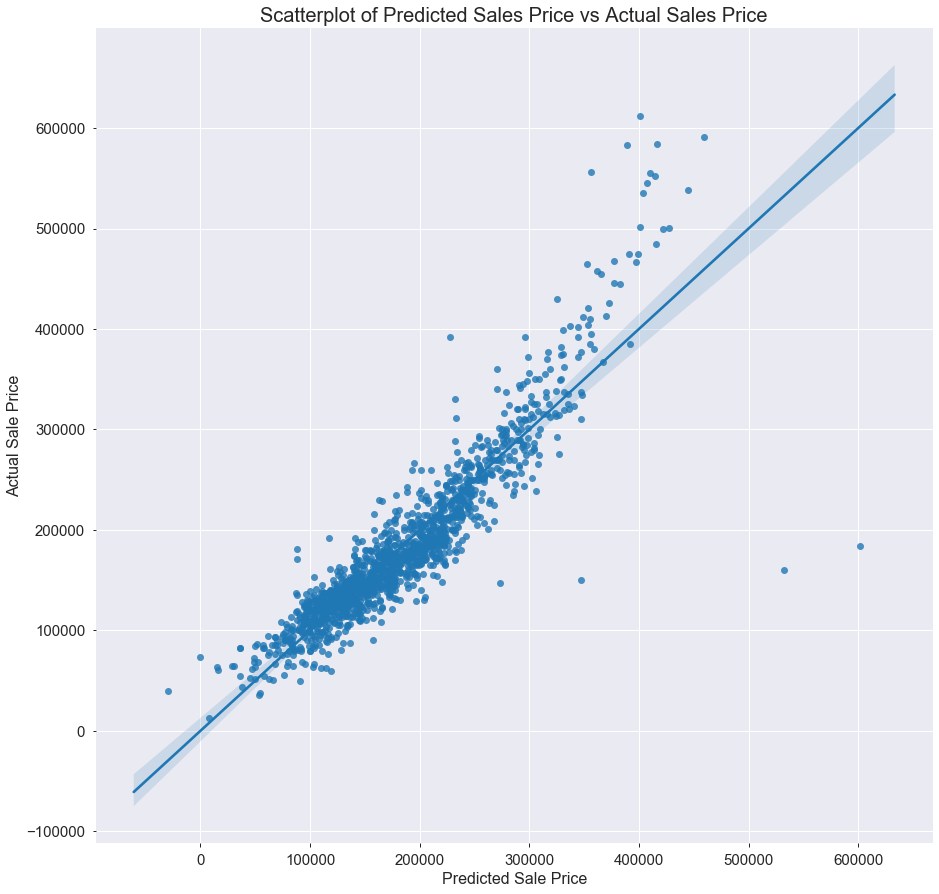

In [2892]:
## plotting the fit of the predicted vs the actual sale price
plt.figure(figsize = (15,15))
ax = sns.regplot(predictions, y_train)
ax.plot()
ax.set_title('Scatterplot of Predicted Sales Price vs Actual Sales Price', size = 20)
ax.set_ylabel('Actual Sale Price', size = 16)
ax.set_xlabel('Predicted Sale Price', size = 16)
plt.yticks(size = 15)
plt.xticks(size = 15)

In [2893]:
print(model.coef_)
print(model.intercept_)
np.sqrt(mean_squared_error(y_train, predictions))

[18447.39036742  7626.78706546 -4611.06981767  6167.51327616
 18287.92271429  5302.32361032  6414.10376294  1258.46646932
  6388.6997598   4708.51531307  6353.50048852  2249.08074479
  8528.79413695  2963.57873536  6876.10107685  8623.92468998
 -3526.94036972 -2920.60768114  4508.61901375  8744.53095479
  6277.23689358  -371.14684497   857.60846648   450.06243836
 -5894.71965442 -1294.05209613]
180717.9693379791


32933.693008226874

In [2894]:
n = 2051
p = len(interest_list)

In [2895]:
## adj r2 value for training set
adjr2_lr1 = 1-(1-(score))*(n-1)/(n-p-1)
adjr2_lr1

0.8285210802803273

In [2896]:
score2 =lr.score(X_test_sc, y_test)

prediction2 = model.predict(X_test_sc)

## adj r2 value for test set
adjr2_lr2 = 1-(1-(score2))*(n-1)/(n-p-1)
adjr2_lr2 

0.8587401232575231

In [2897]:
## RMSE value
np.sqrt(mean_squared_error(y_test, prediction2))  

28873.197062950938

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.]), <a list of 7 Text xticklabel objects>)

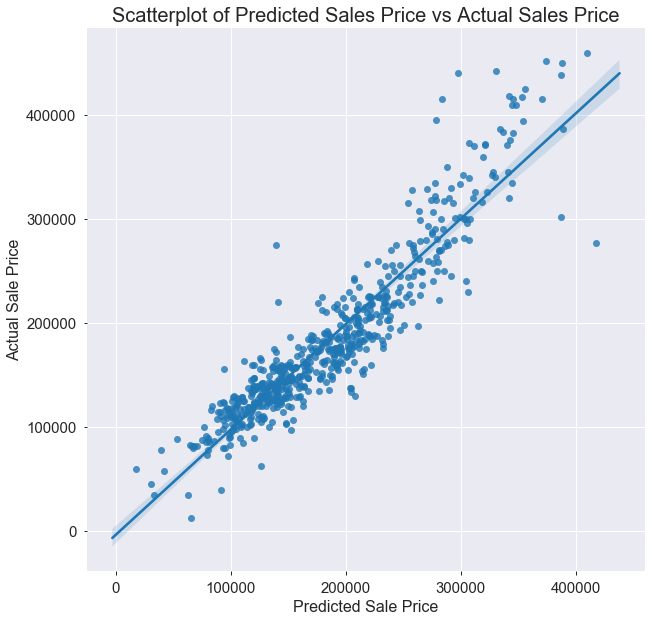

In [2898]:
## plotting the fit of the predicted vs the actual sale price
plt.figure(figsize = (10,10))
ax = sns.regplot(prediction2, y_test)
ax.plot()
ax.set_title('Scatterplot of Predicted Sales Price vs Actual Sales Price', size = 20)
ax.set_ylabel('Actual Sale Price', size = 16)
ax.set_xlabel('Predicted Sale Price', size = 16)
plt.yticks(size = 15)
plt.xticks(size = 15)

In [2899]:
print(model.coef_)
print(model.intercept_)

[18447.39036742  7626.78706546 -4611.06981767  6167.51327616
 18287.92271429  5302.32361032  6414.10376294  1258.46646932
  6388.6997598   4708.51531307  6353.50048852  2249.08074479
  8528.79413695  2963.57873536  6876.10107685  8623.92468998
 -3526.94036972 -2920.60768114  4508.61901375  8744.53095479
  6277.23689358  -371.14684497   857.60846648   450.06243836
 -5894.71965442 -1294.05209613]
180717.9693379791


In [2900]:
## cross validation scores on train dataset
lr_scores = cross_val_score(lr, X_train_sc, y_train, cv = 5)
print(lr_scores)
lr_scores.mean()

[0.83951236 0.81776343 0.86044835 0.78956273 0.65378331]


0.7922140359510349

In [2901]:
## cross validation scores on test dataset
lr2_scores = cross_val_score(lr, X_test_sc, y_test, cv = 5)
print(lr2_scores)
lr2_scores.mean()

[0.86567014 0.89481436 0.85250138 0.8585781  0.87665334]


0.8696434644703454

Linear Regression is rejected for modelling housing prices as there is very high cross_val_scores.

### Lasso Regression

In [2902]:
## Initialising Lasso Regression in Scikit
ls = LassoCV(n_alphas = 200)

In [2903]:
X_train_sc.shape

(1435, 26)

In [2904]:
## cross validating Lasso Regression with training set.
ls_scores = cross_val_score(ls, X_train_sc, y_train, cv = 5)
print(ls_scores)
ls_scores.mean()

/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You sho

[0.83502949 0.81062643 0.85325685 0.79019368 0.64793634]


/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.7874085587287849

In [2905]:
X_train_sc

array([[-6.79941799e-02,  1.85542776e+00, -6.83356918e-02, ...,
        -1.55783118e-01, -7.00140042e-02,  7.60695646e-01],
       [ 6.28946165e-01, -5.56076337e-01, -6.83356918e-02, ...,
        -1.55783118e-01, -7.00140042e-02, -1.31458620e+00],
       [-7.64934524e-01, -5.56076337e-01, -6.83356918e-02, ...,
        -1.55783118e-01, -7.00140042e-02,  7.60695646e-01],
       ...,
       [-6.79941799e-02,  5.66226501e-03,  1.60106099e+01, ...,
        -1.55783118e-01, -7.00140042e-02,  7.60695646e-01],
       [-6.79941799e-02,  1.64537829e-01, -6.83356918e-02, ...,
        -1.55783118e-01, -7.00140042e-02,  7.60695646e-01],
       [ 6.28946165e-01,  8.28410723e-01, -6.83356918e-02, ...,
        -1.55783118e-01, -7.00140042e-02,  7.60695646e-01]])

In [2906]:
ls.fit(X_train_sc, y_train) ## fitting lasso model

/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=200, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [2907]:
ls.score(X_train_sc, y_train)

0.8207089336867196

In [2908]:
## cross validating Lasso Regression with test set.
ls_scores2 = cross_val_score(ls, X_test_sc, y_test, cv = 5)
print(ls_scores2)
ls_scores2.mean()

/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You sho

[0.87455202 0.89429405 0.84842296 0.86788625 0.87295871]


0.8716227971572869

In [2909]:
score2 = ls.score(X_test_sc, y_test)

In [2910]:
predls = ls.predict(X_test_sc)

In [2914]:
ls_test_r2score = r2_score(y_test, predls)
ls_test_r2score

0.8672990740348917

In [2915]:
## RMSE value
np.sqrt(mean_squared_error(y_test, predls))

28163.985794283268

In [2916]:
sum(ls.coef_ != 0)

18

In [2917]:
## finding for ajusted colleagues
p = np.sum(ls.coef_ != 0)
adjr2_ls2= 1-(1-(ls_test_r2score))*(n-1)/(n-p-1)
adjr2_ls2 

0.8661235737064606

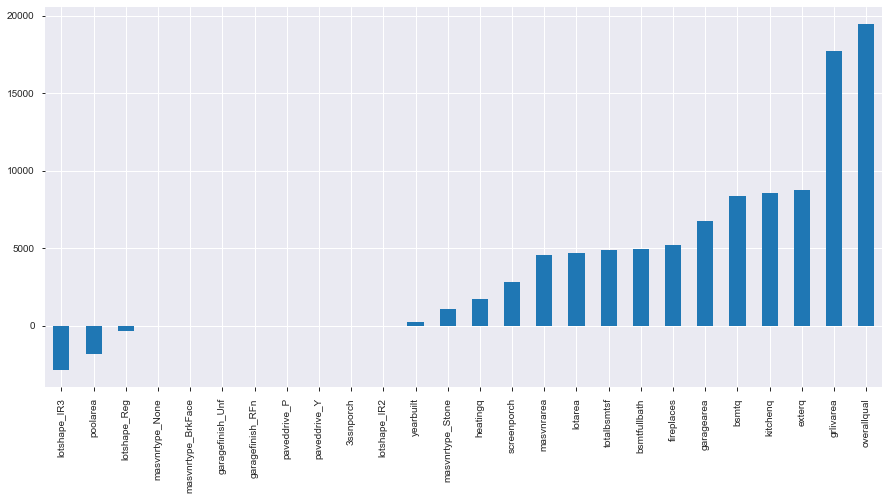

In [2986]:
pd.Series(ls.coef_, index = interest_list).sort_values(ascending =True).plot.bar(figsize=(15,7))


In [2919]:
## plotting out the residuals against the predicted y
residual_ls = y_test - predls

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000., 450000.]), <a list of 10 Text xticklabel objects>)

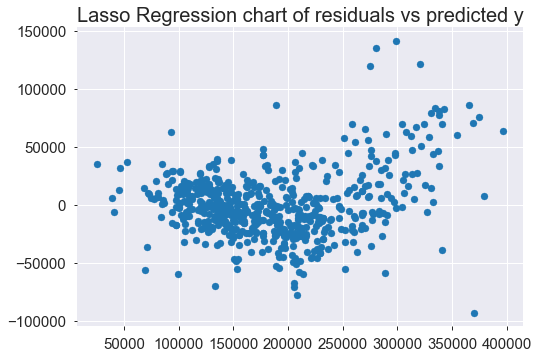

In [2990]:
plt.scatter(predls, residual_ls)
plt.title('Lasso Regression chart of residuals vs predicted y', size = 20)
plt.yticks( size = 15)
plt.xticks(size = 15)

### Ridge Regression

In [2921]:
## Ridge Regression was initialised
rd = RidgeCV(alphas = np.linspace(0.1, 10, 100))

In [2922]:
rd_scores = cross_val_score(rd, X_train_sc, y_train, cv = 3)
print(rd_scores)
rd_scores.mean()

[0.83331456 0.83849588 0.65675411]


0.7761881818800136

In [2923]:
print(rd.fit(X_train_sc, y_train))
print(rd.score(X_train_sc, y_train))

RidgeCV(alphas=array([ 0.1,  0.2, ...,  9.9, 10. ]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)
0.8306598383643382


In [2924]:
rd_scores2 = cross_val_score(rd, X_test_sc, y_test, cv = 3)
print(rd_scores2)
rd_scores2.mean()

[0.87084436 0.85864779 0.8749455 ]


0.8681458827403334

In [2925]:
rd.score(X_train_sc, y_train)

0.8306598383643382

In [2926]:
predrd = rd.predict(X_test_sc)

In [2927]:
rdr2score= r2_score(y_test, predrd)
rdr2score

0.860350547773094

In [2928]:
## RMSE value
np.sqrt(mean_squared_error(y_test, predrd)) 

28891.943586491474

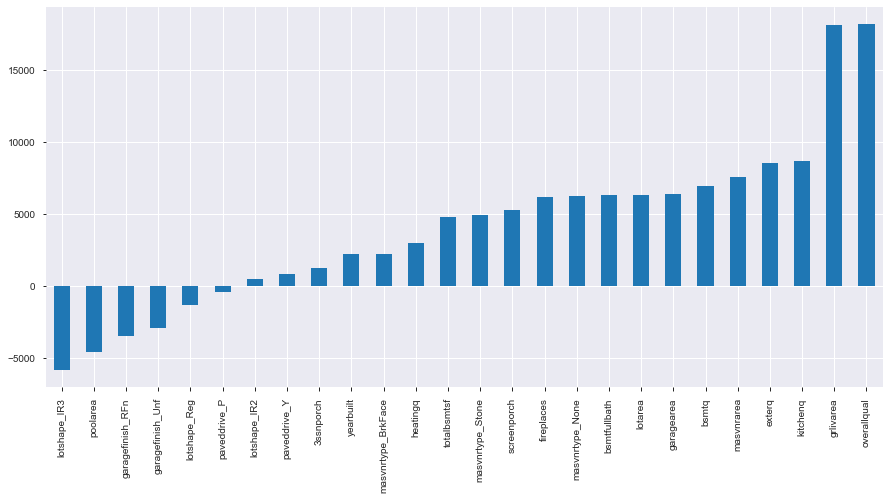

In [2929]:
pd.Series(rd.coef_, index = interest_list).sort_values(ascending = True).plot.bar(figsize=(15,7))

In [2930]:
p = np.sum(rd.coef_ != 0)
adjr2_rd = 1-(1-(rdr2score))*(n-1)/(n-p-1)
adjr2_rd

0.8585566318848038

In [2931]:
## plotting out the residuals against the predicted y
residuals = y_test - predrd

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000., 400000., 450000.]),
 <a list of 11 Text xticklabel objects>)

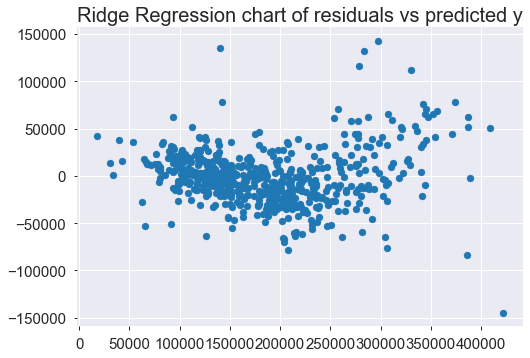

In [2989]:
plt.scatter(predrd, residuals)
plt.title('Ridge Regression chart of residuals vs predicted y', size = 20)
plt.yticks( size = 15)
plt.xticks(size = 15)

In [2933]:
# RMSE value
np.sqrt(mean_squared_error(y_test2, predrd2))

29162.42478945767

### Test data

Test data is cleaned and explored.

It was decided that Lasso regression was to be done as it had produced the best r2 value and RMSE for the split test data.

|Test|Adj r2 score|RMSE|
|---|---|---|
|Linear Regression|0.8587401232575231|28873.197062950938|
|Lasso Regression|0.8661235737064606|28163.985794283268|
|Ridge Regression|0.8585566318848038|28891.9435864914747|

In [2934]:
test = pd.read_csv('../datasets/test.csv', index_col='Id')

In [2935]:
#look at the data structure
test.info()
#columns of note: Alley, Pool QC, Fence, Misc Feature, Fireplace QC  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 2658 to 1939
Data columns (total 79 columns):
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       719 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              58 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof Matl          879 non-null object
E

In [2936]:
test.shape

(879, 79)

**Dropping data that have significantly incomplete data**

Data that are have less than 60% data are dropped as they would signifcantly influence the data (similar to earlier)

In [2937]:
test = test.drop('Alley', axis = 1)

In [2938]:
test = test.drop('Pool QC', axis = 1)

In [2939]:
test = test.drop("Fence", axis = 1)

In [2940]:
test = test.drop("Misc Feature", axis = 1)

In [2941]:
test = test.drop("Fireplace Qu", axis = 1)

In [2942]:
test = test.drop("PID", axis = 1) #deleted as there is no use

In [2943]:
test.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type
Id,,,,,,,,,,,,,,,,,,,,,
2658,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,60,112,0,0,0,0,4,2006,WD
2718,90,RL,NaN,9662,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,170,0,0,0,0,0,0,8,2006,WD
2414,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,100,24,0,0,0,0,0,9,2006,New
1989,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,184,0,0,0,0,7,2007,WD
625,20,RL,NaN,9500,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,76,0,0,185,0,0,7,2009,WD


In [2944]:
## renaming test.csv columns
test_col = test.columns
test_rename_dict = {}
for col in test_col: 
    test_rename_dict[col] = col.lower().replace(' ', "")

test.rename(columns = test_rename_dict, inplace = True)
test.columns

Index(['mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope',
       'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle',
       'overallqual', 'overallcond', 'yearbuilt', 'yearremod/add', 'roofstyle',
       'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea',
       'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond',
       'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc',
       'centralair', 'electrical', '1stflrsf', '2ndflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd',
       'functional', 'fireplaces', 'garagetype', 'garageyrblt', 'garagefinish',
       'garagecars', 'garagearea', 'garagequal', 'garagecond', 'paveddrive',
       'wooddecksf', 'openporchsf

In [2945]:
## mapping qual variables to qual testing
test['exterq'] = test.exterqual.map(qual)
test = test.drop('exterqual', axis = 1)
test['heatingq'] = test.heatingqc.map(qual)
test = test.drop('heatingqc', axis = 1)
test['bsmtq'] = test.bsmtqual.map(qual)
test = test.drop('bsmtqual', axis = 1)
test['kitchenq'] = test.kitchenqual.map(qual)
test = test.drop('kitchenqual', axis = 1)

In [2946]:
interesttest = [x for x in interest if x != 'saleprice']
len(interesttest)

20

In [2947]:
len(interesttest)

20

In [2948]:
## creating df for test csv
test_interest_only = test[interesttest]

In [2949]:
## observing the dataset
test_interest_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 2658 to 1939
Data columns (total 20 columns):
garagefinish    834 non-null object
masvnrtype      878 non-null object
paveddrive      879 non-null object
lotshape        879 non-null object
overallqual     879 non-null int64
masvnrarea      878 non-null float64
poolarea        879 non-null int64
fireplaces      879 non-null int64
grlivarea       879 non-null int64
screenporch     879 non-null int64
lotarea         879 non-null int64
3ssnporch       879 non-null int64
bsmtfullbath    879 non-null int64
totalbsmtsf     879 non-null int64
garagearea      879 non-null int64
yearbuilt       879 non-null int64
exterq          879 non-null int64
heatingq        879 non-null int64
bsmtq           854 non-null float64
kitchenq        879 non-null int64
dtypes: float64(2), int64(14), object(4)
memory usage: 144.2+ KB


In [2950]:
## filling in the missing variables
print(test_interest_only.garagefinish.mode())
print(test_interest_only.masvnrtype.mode())

0    Unf
dtype: object
0    None
dtype: object


To impute the missing entries for categorical variables, the mode of each column will be used. 

In [2951]:
## replacing all NaN with mode
test_interest_only['garagefinish'].fillna('Unf', inplace = True)
test_interest_only['masvnrtype'].fillna('None', inplace = True)

/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [2952]:
test_interest_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 2658 to 1939
Data columns (total 20 columns):
garagefinish    879 non-null object
masvnrtype      879 non-null object
paveddrive      879 non-null object
lotshape        879 non-null object
overallqual     879 non-null int64
masvnrarea      878 non-null float64
poolarea        879 non-null int64
fireplaces      879 non-null int64
grlivarea       879 non-null int64
screenporch     879 non-null int64
lotarea         879 non-null int64
3ssnporch       879 non-null int64
bsmtfullbath    879 non-null int64
totalbsmtsf     879 non-null int64
garagearea      879 non-null int64
yearbuilt       879 non-null int64
exterq          879 non-null int64
heatingq        879 non-null int64
bsmtq           854 non-null float64
kitchenq        879 non-null int64
dtypes: float64(2), int64(14), object(4)
memory usage: 144.2+ KB


In [2953]:
## creating dummy variables for categorical variables
test_interest_only = pd.get_dummies(test_interest_only, drop_first = True)

In [2954]:
test_interest_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 2658 to 1939
Data columns (total 27 columns):
overallqual           879 non-null int64
masvnrarea            878 non-null float64
poolarea              879 non-null int64
fireplaces            879 non-null int64
grlivarea             879 non-null int64
screenporch           879 non-null int64
lotarea               879 non-null int64
3ssnporch             879 non-null int64
bsmtfullbath          879 non-null int64
totalbsmtsf           879 non-null int64
garagearea            879 non-null int64
yearbuilt             879 non-null int64
exterq                879 non-null int64
heatingq              879 non-null int64
bsmtq                 854 non-null float64
kitchenq              879 non-null int64
garagefinish_RFn      879 non-null uint8
garagefinish_Unf      879 non-null uint8
masvnrtype_BrkFace    879 non-null uint8
masvnrtype_CBlock     879 non-null uint8
masvnrtype_None       879 non-null uint8
masvnrtype_Stone      879 

0.0


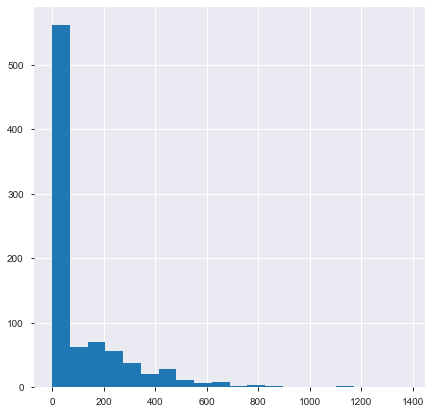

In [2956]:
test_interest_only.masvnrarea.hist(bins=20, figsize = (7,7))
print(test_interest_only.masvnrarea.median())
test_interest_only['masvnrarea'].fillna(test_interest_only.masvnrarea.median(), inplace = True)

In [2960]:
test_interest_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 2658 to 1939
Data columns (total 27 columns):
overallqual           879 non-null int64
masvnrarea            879 non-null float64
poolarea              879 non-null int64
fireplaces            879 non-null int64
grlivarea             879 non-null int64
screenporch           879 non-null int64
lotarea               879 non-null int64
3ssnporch             879 non-null int64
bsmtfullbath          879 non-null int64
totalbsmtsf           879 non-null int64
garagearea            879 non-null int64
yearbuilt             879 non-null int64
exterq                879 non-null int64
heatingq              879 non-null int64
bsmtq                 854 non-null float64
kitchenq              879 non-null int64
garagefinish_RFn      879 non-null uint8
garagefinish_Unf      879 non-null uint8
masvnrtype_BrkFace    879 non-null uint8
masvnrtype_CBlock     879 non-null uint8
masvnrtype_None       879 non-null uint8
masvnrtype_Stone      879 

(0.8205889463424683, 3.342960736676372e-30)
4.0


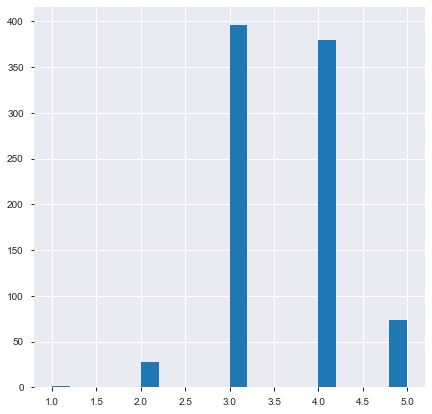

In [2965]:
test_interest_only.bsmtq.hist(bins=20, figsize = (7,7))
print(stats.shapiro(test_interest_only.bsmtq.dropna()))
## The Shapiro-Wilks test showed the distribution is significantly non- normal, median used to impute 
print(test_interest_only.bsmtq.median())
test_interest_only['bsmtq'].fillna(test_interest_only.bsmtq.median(), inplace = True)

In [2972]:
test_interest_only = test_interest_only.drop('masvnrtype_CBlock', axis = 1)

In [2973]:
## renaming the df
X_test_test = test_interest_only

print(test_interest_only.shape)
print(test_interest_only.info())

(879, 26)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 2658 to 1939
Data columns (total 26 columns):
overallqual           879 non-null int64
masvnrarea            879 non-null float64
poolarea              879 non-null int64
fireplaces            879 non-null int64
grlivarea             879 non-null int64
screenporch           879 non-null int64
lotarea               879 non-null int64
3ssnporch             879 non-null int64
bsmtfullbath          879 non-null int64
totalbsmtsf           879 non-null int64
garagearea            879 non-null int64
yearbuilt             879 non-null int64
exterq                879 non-null int64
heatingq              879 non-null int64
bsmtq                 879 non-null float64
kitchenq              879 non-null int64
garagefinish_RFn      879 non-null uint8
garagefinish_Unf      879 non-null uint8
masvnrtype_BrkFace    879 non-null uint8
masvnrtype_None       879 non-null uint8
masvnrtype_Stone      879 non-null uint8
paveddrive_P    

In [2974]:
## Scaling the variables to same scale
ss = StandardScaler()
ss.fit(X_test_test)
X_test_test_sc = ss.transform(X_test_test)

X_test_test_sc.shape

/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


(879, 26)

In [2975]:
## predicting the saleprice 
predtestls = ls.predict(X_test_test_sc)
predtestls

array([135477.39675389, 174881.80759959, 219694.54579793, 127623.31981381,
       202884.05968748,  88376.55315178,  95873.75323992, 145215.2999493 ,
       209136.50440486, 155999.76198184, 180039.31679054, 125715.55179207,
       156841.16723161, 278470.61950552, 156755.61991732, 132612.82251223,
       169002.12723802, 122499.73649156, 192248.76856935, 220812.30691271,
       144286.45875942, 129164.54022988, 219080.86725744, 164000.73679067,
       200193.34846678, 103737.48696857, 130016.24605346, 141328.95770934,
       158881.77182853,  45522.64230292,  99848.86293059, 104780.58088558,
       251270.72093937, 156073.86845586, 235553.98328051, 189157.43779839,
       106967.52937645,  83911.37473572, 128646.28969193, 207591.74846104,
       180610.92160127, 222560.54172588, 153858.74244448, 177655.25045668,
       242519.647593  ,  95576.4426452 , 239634.6407923 , 115713.21266107,
       125611.97686226, 117248.28363611, 113224.23836804, 216505.18672615,
       257607.01580843, 1

In [2983]:
## creating a new column for the predicted sale price
test_interest_only['SalePrice'] = predtestls

In [2984]:
## Exporting out the predicted saleprice values out into a csv
test_interest_only.SalePrice.to_csv('../datasets/result.csv', index_label = ['Id'], header = ['SalePrice'])

## Conclusion

The following variables support the price of houses in the Ames: 


In [2987]:
interest

['garagefinish',
 'masvnrtype',
 'paveddrive',
 'lotshape',
 'overallqual',
 'masvnrarea',
 'poolarea',
 'fireplaces',
 'grlivarea',
 'screenporch',
 'lotarea',
 '3ssnporch',
 'bsmtfullbath',
 'totalbsmtsf',
 'garagearea',
 'yearbuilt',
 'exterq',
 'heatingq',
 'bsmtq',
 'kitchenq']

With the relationship of:

In [2979]:
conc = pd.DataFrame()
conc['Var'] = interest_list
conc['Coeff'] = ls.coef_
conc.sort_values(by="Coeff").head(50)

,Var,Coeff
24,lotshape_IR3,-2877.045090
2,poolarea,-1816.078985
25,lotshape_Reg,-362.965077
19,masvnrtype_None,-0.000000
18,masvnrtype_BrkFace,-0.000000
17,garagefinish_Unf,-0.000000
16,garagefinish_RFn,-0.000000
21,paveddrive_P,-0.000000
22,paveddrive_Y,0.000000
7,3ssnporch,0.000000


In [2991]:
print(interest_list)

['overallqual', 'masvnrarea', 'poolarea', 'fireplaces', 'grlivarea', 'screenporch', 'lotarea', '3ssnporch', 'bsmtfullbath', 'totalbsmtsf', 'garagearea', 'yearbuilt', 'exterq', 'heatingq', 'bsmtq', 'kitchenq', 'garagefinish_RFn', 'garagefinish_Unf', 'masvnrtype_BrkFace', 'masvnrtype_None', 'masvnrtype_Stone', 'paveddrive_P', 'paveddrive_Y', 'lotshape_IR2', 'lotshape_IR3', 'lotshape_Reg']


In [2981]:
ls.coef_

array([19451.0005346 ,  4539.45402705, -1816.07898463,  5193.39026465,
       17731.62543776,  2823.9961593 ,  4681.67834761,     0.        ,
        4917.02673845,  4896.78876537,  6719.55425399,   206.60422211,
        8723.5413717 ,  1704.46862136,  8385.68527889,  8541.79537015,
          -0.        ,    -0.        ,    -0.        ,    -0.        ,
        1085.85382549,    -0.        ,     0.        ,     0.        ,
       -2877.04509003,  -362.96507706])